In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifire
from sklearn.model_selection import GridSearchCV

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [10]:
x_train , x_test = x_train/255.0,x_test/255.0

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(75,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
]);

In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [13]:
call_back = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [14]:
history = model.fit(x_train , y_train , epochs=20 , validation_split=0.1 , callbacks=[call_back])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2361 - loss: 2.0836 - val_accuracy: 0.3096 - val_loss: 1.9342
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3618 - loss: 1.7876 - val_accuracy: 0.3338 - val_loss: 1.8719
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3959 - loss: 1.6854 - val_accuracy: 0.3866 - val_loss: 1.7379
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4189 - loss: 1.6288 - val_accuracy: 0.4196 - val_loss: 1.6119
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4440 - loss: 1.5775 - val_accuracy: 0.4340 - val_loss: 1.5939
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4502 - loss: 1.5442 - val_accuracy: 0.4278 - val_loss: 1.6109
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4579 - loss: 1.5178 - val_accuracy: 0.4348 - val_loss: 1.5676
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4706 - loss: 1.4841 -

In [15]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4529 - loss: 1.5428


[1.5537033081054688, 0.44530001282691956]

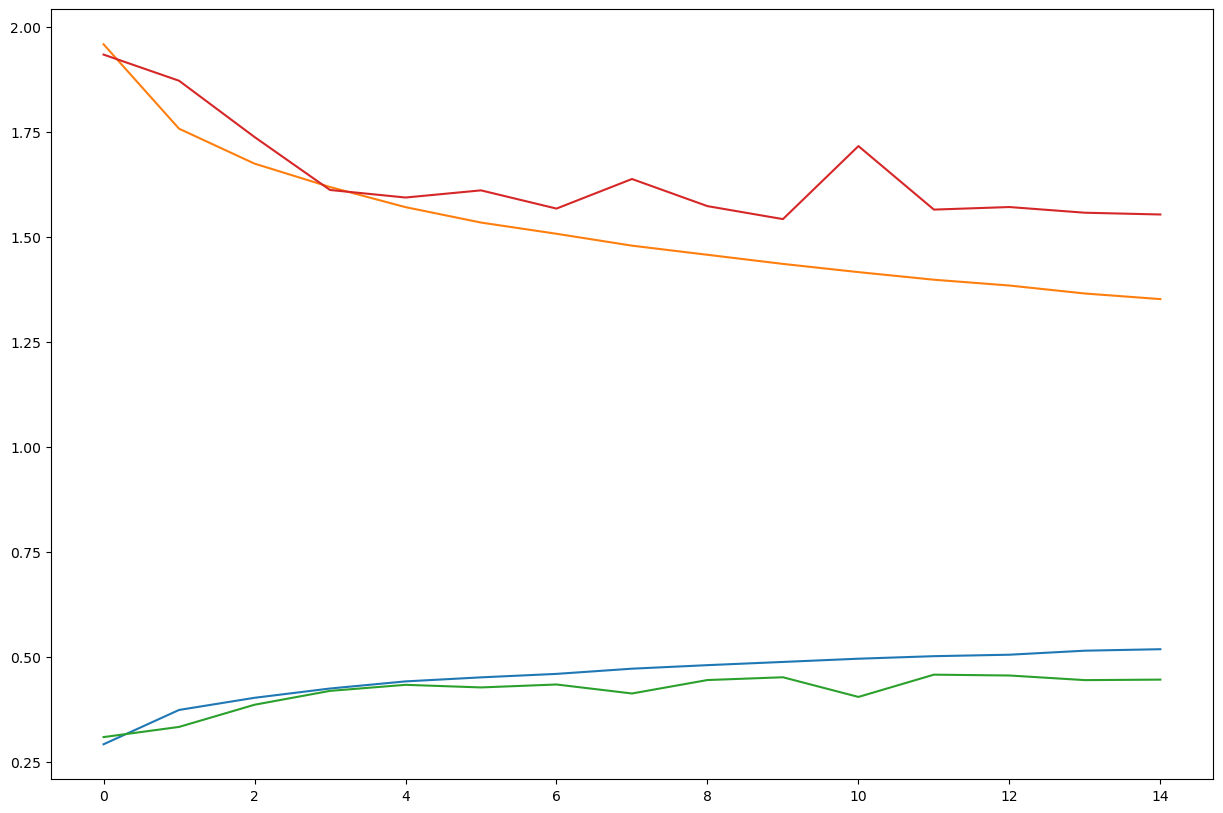

In [23]:
fig , ax = plt.subplots(figsize=(15,10))
ax.plot(history.history['accuracy'])
ax.plot(history.history['loss'])
ax.plot(history.history['val_accuracy'])
ax.plot(history.history['val_loss'])

## Hyper Parameter optimization

In [25]:
def nn_model(hidden_layers=1,neurons=50,lr=0.01):
    model_opt = keras.models.Sequential()
    model_opt.add(keras.layers.InputLayer())
    for hidden_layer in range(hidden_layers):
        model_opt.add(keras.layers.Dense(neurons,activation='relu')) 
    model_opt.add(keras.layers.Dense(1,activation='softmax')) 
    sgd = keras.optimizers.SGD(lr=lr)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd)
    return model_opt

In [30]:
keras_wraooer = KerasClassifire(nn_model)

In [29]:
param_grid={
    'hidden_layers' :[2,3,5],
    'neurons' : [100,50,75],
    'lr' : [0.1,0.01,0.001]
}

In [32]:
keras_grid = GridSearchCV(keras_wraooer,param_grid)

In [33]:
keras_grid.fit(x_train,y_train,callbacks=[call_back],epochs=30)